# Assignment 2

This program makes plots of monthly climatology of vertically integrated twice daily ERA5 horizontal wind for 1986-2015 in the Pacific North American region.

1. Read in ERA5 u, v:
    * NDJFM data for a given variable: `/glade/work/mkorendy/metisregimes/era5.AR.variable_pna_NDJFM.1986-2016.nc`
    * April through October data for a given variable: `/glade/work/mkorendy/metisregimes/era5.AR.variable_pna_A-O.1986-2016.nc`

2. Vertically integrate horizontal wind

2. Calculate magnitude of vertically integrated horizontal wind

4. Calculate monthly climatologies

5. Plot monthly climatologies in 12-panel plot

## Imports

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

## Files

In [3]:
#Path
path = '/glade/work/mkorendy/metisregimes/'

#NDJFM Files
f_u = path + 'era5.AR.u_pna_NDJFM.1986-2016.nc'
f_v = path + 'era5.AR.v_pna_NDJFM.1986-2016.nc'

# AMJJASO Files
f_u2 = path + 'era5.AR.u_pna_A-O.1986-2016.nc'
f_v2 = path + 'era5.AR.v_pna_A-O.1986-2016.nc'

## Read data in

In [4]:
# NDJFM
ds_u = xr.open_dataset(f_u).drop(['number','step','valid_time'])
ds_v = xr.open_dataset(f_v).drop(['number','step','valid_time'])

# April thru October
ds_u2 = xr.open_dataset(f_u2).drop(['number','step','valid_time'])
ds_v2 = xr.open_dataset(f_v2).drop(['number','step','valid_time'])

#Create full year dataset
ds_u = xr.concat([ds_u, ds_u2], dim='time')
ds_v = xr.concat([ds_v, ds_v2], dim='time')

## Integrate over pressure

In [5]:
#Integration based on metis level thicknesses, and so requires specified level thicknesses
#Define level pressure thickness
pressures = [1000-962.5, 962.5 - 887.5, 887.5 - 775, 100, 100, 100, 100, 100, 100, 100, 150-75, 75-40, 40-20, 400-350]
len(pressures)

14

In [6]:
levs = ds_u['isobaricInhPa']
uqvi = []
vqvi = []

#Iterate through the pressures
for k in np.arange(0,len(pressures)-1):
    uqvi.append(ds_u.sel(isobaricInhPa = levs[k]) * (pressures[k]))
    vqvi.append(ds_v.sel(isobaricInhPa = levs[k]) * (pressures[k]))

In [7]:
ds_uqvi = xr.combine_nested(uqvi, concat_dim='levs')
ds_vqvi = xr.combine_nested(vqvi, concat_dim='levs')

In [8]:
# Sum over pressure levels
da_uqvi = ds_uqvi.sum('levs')
da_vqvi = ds_vqvi.sum('levs')

## Calculate magnitude of horizontal wind

In [9]:
ds_mag = (da_uqvi['u']**2 + da_vqvi['v']**2)**(1/2)
ds_mag

<xarray.DataArray (time: 21914, lat: 22, lon: 53)>
array([[[12629.051  , 12186.344  , 11887.057  , ...,  4715.779  ,
          5014.8354 ,  6030.8916 ],
        [15841.367  , 15086.805  , 13910.016  , ...,  7413.1196 ,
          7619.166  ,  6272.63   ],
        [17118.795  , 17351.83   , 15581.982  , ...,  6647.572  ,
          6521.816  ,  7068.502  ],
        ...,
        [ 5537.129  ,  5858.876  ,  6608.892  , ...,  2497.424  ,
           557.6578 ,  4528.2925 ],
        [  669.2739 ,  2333.3909 ,  4054.6956 , ...,  5051.2437 ,
          6134.685  , 10002.571  ],
        [ 2030.5659 ,  2101.02   ,  1233.0239 , ...,  9496.089  ,
         10098.9795 , 13059.402  ]],

       [[10683.315  ,  9259.224  ,  7479.8525 , ...,  7909.9834 ,
          8448.341  ,  9120.328  ],
        [15042.913  , 13363.791  , 11217.349  , ...,  6582.505  ,
          7844.507  ,  7847.703  ],
        [14046.048  , 14299.783  , 12790.962  , ...,  6305.181  ,
          6577.9995 ,  7065.905  ],
        ...,
        [ 5853.2075 ,  6364.238  ,  7264.0396 , ...,  2318.5176 ,
          4261.8467 ,  7089.6074 ],
        [  316.4698 ,  2399.5105 ,  3676.5542 , ...,  4577.41   ,
          6052.007  ,  8134.555  ],
        [ 4938.9385 ,  4393.734  ,  5304.1187 , ...,  8160.3    ,
          9551.785  , 11668.3955 ]],

       [[ 8325.022  ,  6043.085  ,  3954.9255 , ...,  9371.535  ,
          8362.453  ,  7897.85   ],
        [11818.713  , 10036.9795 ,  7996.984  , ...,  5803.38   ,
          6513.7285 ,  5905.238  ],
        [ 8628.452  ,  9884.156  , 10503.231  , ...,  5217.6206 ,
          6402.6016 ,  7349.723  ],
        ...,
        [ 6615.5576 ,  5086.1133 ,  5851.614  , ...,  3728.741  ,
          5465.413  ,  7632.186  ],
        [  963.1118 ,  1972.932  ,  4186.484  , ...,  2736.694  ,
          5232.059  ,  8292.68   ],
        [ 5211.387  ,  6322.331  ,  6715.424  , ...,  6771.3765 ,
          7926.312  , 10190.512  ]],

       ...,

       [[ 5255.1514 ,  5599.8257 ,  6059.576  , ..., 18299.969  ,
         20511.395  , 22158.635  ],
        [ 6647.489  ,  6728.411  ,  7310.8535 , ..., 19338.098  ,
         23175.35   , 25649.225  ],
        [ 9743.932  , 10052.5205 , 11125.73   , ...,  9612.835  ,
         11695.299  , 15030.158  ],
        ...,
        [ 1881.561  ,  1224.0736 ,  1104.488  , ...,  5518.2847 ,
          4086.5796 ,  3416.4937 ],
        [ 1921.5735 ,   922.18604,  2621.5767 , ...,  3590.7205 ,
          2350.2456 ,  1893.9196 ],
        [ 3028.3108 ,  4408.597  ,  6247.8687 , ...,  2335.7458 ,
          1675.9889 ,  2560.8716 ]],

       [[ 4914.028  ,  4770.649  ,  4401.2183 , ..., 12934.795  ,
         14288.854  , 16402.71   ],
        [ 8076.678  ,  7012.7725 ,  6631.0913 , ..., 10467.747  ,
         11309.184  , 11013.547  ],
        [ 7367.9727 ,  7400.8403 ,  7518.7183 , ..., 11733.274  ,
         13060.261  , 12401.101  ],
        ...,
        [ 1762.8938 ,  2570.849  ,  4029.506  , ...,  8500.861  ,
          6089.231  ,  4538.014  ],
        [ 1707.676  ,   752.62164,  3628.6174 , ...,  4073.3757 ,
          3695.89   ,  2623.548  ],
        [ 3654.1755 ,  4269.1187 ,  6275.3667 , ...,  2547.9849 ,
          2791.3027 ,  2587.3188 ]],

       [[ 8712.265  ,  7211.877  ,  5641.5225 , ...,  7510.416  ,
          8519.063  , 10522.607  ],
        [ 9881.7    ,  7945.007  ,  6637.809  , ...,  6747.997  ,
          8959.634  , 11460.007  ],
        [ 8579.744  ,  7192.5    ,  6048.8047 , ...,  9478.544  ,
         11899.671  , 14664.917  ],
        ...,
        [ 3549.9436 ,  3025.2144 ,  5546.2793 , ...,  8119.259  ,
          6303.6724 ,  4481.231  ],
        [ 2177.159  ,  1151.026  ,  3088.4194 , ...,  5210.123  ,
          3764.2542 ,  2511.975  ],
        [ 3686.1401 ,  4115.0127 ,  5554.317  , ...,  3424.8674 ,
          1853.5068 ,  2134.8735 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 79.53 76.74 73.95 71.16 ... 29.3 26.51 23.72 20.93
  * lon      (lon) float64 151.9 154.7 157.5 160.3 ... 289.7 292.5 2

## Calculate monthly climatologies

In [10]:
# Take monthly means
ds_clim = ds_mag.groupby('time.month').mean()
ds_clim

<xarray.DataArray (month: 12, lat: 22, lon: 53)>
array([[[13030.503 , 13119.001 , 13185.894 , ...,  9022.185 ,
          9128.851 ,  9721.141 ],
        [13404.561 , 13464.103 , 13499.14  , ...,  9278.214 ,
          9716.7705,  9864.448 ],
        [13270.092 , 13336.058 , 13380.32  , ...,  9948.33  ,
         10214.553 , 10531.873 ],
        ...,
        [29625.463 , 29183.025 , 28709.297 , ..., 16693.04  ,
         16080.485 , 15378.295 ],
        [20737.871 , 20330.22  , 19966.547 , ..., 12504.363 ,
         12183.545 , 11854.807 ],
        [12030.992 , 11823.964 , 11645.929 , ...,  9213.653 ,
          9227.523 ,  9264.711 ]],

       [[12457.395 , 12583.201 , 12716.351 , ...,  9332.118 ,
          9320.134 ,  9753.097 ],
        [12424.153 , 12543.215 , 12660.338 , ...,  9227.724 ,
          9534.708 ,  9657.849 ],
        [12223.834 , 12314.19  , 12364.106 , ...,  9654.021 ,
          9771.159 ,  9990.961 ],
        ...,
        [30068.6   , 29716.021 , 29289.92  , ..., 18322.8   ,
         17778.506 , 17154.67  ],
        [21982.629 , 21694.87  , 21377.615 , ..., 14071.502 ,
         13808.3125, 13534.95  ],
        [13714.941 , 13597.355 , 13483.998 , ..., 10746.96  ,
         10786.207 , 10849.479 ]],

       [[12761.031 , 12897.987 , 13033.47  , ...,  9256.906 ,
          9155.779 ,  9395.088 ],
        [12664.63  , 12822.428 , 12974.319 , ...,  9298.269 ,
          9429.947 ,  9435.152 ],
        [12383.493 , 12594.025 , 12815.097 , ..., 10293.182 ,
         10285.4375, 10285.385 ],
        ...,
        [24869.879 , 24043.406 , 23154.277 , ..., 17699.393 ,
         17406.727 , 17026.428 ],
        [18416.191 , 17819.38  , 17231.973 , ..., 14866.449 ,
         14673.188 , 14505.375 ],
        [11792.624 , 11645.887 , 11504.812 , ..., 11983.3955,
         12001.692 , 12044.914 ]],

       ...,

       [[ 9990.661 , 10038.434 , 10103.518 , ...,  8676.606 ,
          8800.358 ,  9126.711 ],
        [10169.807 , 10235.542 , 10273.947 , ...,  8898.1   ,
          8874.143 ,  8867.822 ],
        [10392.573 , 10419.108 , 10423.174 , ..., 10522.903 ,
         10442.384 , 10400.125 ],
        ...,
        [ 6772.199 ,  6731.1294,  6790.3613, ...,  7734.1636,
          7601.553 ,  7583.229 ],
        [ 6466.945 ,  6558.5444,  6833.2803, ...,  6499.029 ,
          6605.329 ,  6671.5693],
        [ 7203.342 ,  7277.979 ,  7453.229 , ...,  5996.3174,
          6019.9023,  6013.183 ]],

       [[11455.4375, 11543.014 , 11640.54  , ...,  9165.618 ,
          9391.211 ,  9923.223 ],
        [11536.56  , 11630.554 , 11711.011 , ...,  9439.567 ,
          9638.339 ,  9710.567 ],
        [11305.595 , 11392.268 , 11454.198 , ..., 10362.654 ,
         10428.292 , 10626.734 ],
        ...,
        [12875.194 , 12293.891 , 11846.989 , ..., 11454.18  ,
         11188.123 , 10924.91  ],
        [ 7874.9204,  7846.555 ,  7898.434 , ...,  9316.022 ,
          9296.495 ,  9283.991 ],
        [ 6190.0645,  6473.7554,  6805.5474, ...,  7744.4683,
          7927.65  ,  8064.322 ]],

       [[12350.906 , 12433.618 , 12504.702 , ...,  8967.013 ,
          9112.224 ,  9672.169 ],
        [11967.374 , 11980.532 , 11991.499 , ...,  9281.788 ,
          9605.369 ,  9742.233 ],
        [11595.978 , 11584.379 , 11605.01  , ..., 10373.351 ,
         10571.614 , 10828.881 ],
        ...,
        [22708.86  , 22081.863 , 21502.594 , ..., 14794.897 ,
         14497.321 , 14155.254 ],
        [14210.252 , 13794.614 , 13476.238 , ..., 11452.578 ,
         11364.689 , 11283.315 ],
        [ 7656.916 ,  7611.165 ,  7667.7505, ...,  8814.167 ,
          8957.675 ,  9144.402 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 79.53 76.74 73.95 71.16 ... 29.3 26.51 23.72 20.93
  * lon      (lon) float64 151.9 154.7 157.5 160.3 ... 289.7 292.5 295.3 298.1
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

## Plot monthly climatologies

In [11]:
#Subplot titles
titles = ['January', 'February', 'March', 'April', 
          'May', 'June', 'July', 'August', 'September',
         'October', 'November', 'December']

In [12]:
# Set colors
clevs = np.arange(np.round(min(ds_clim.values.flatten())),np.round(max(ds_clim.values.flatten())), 700)

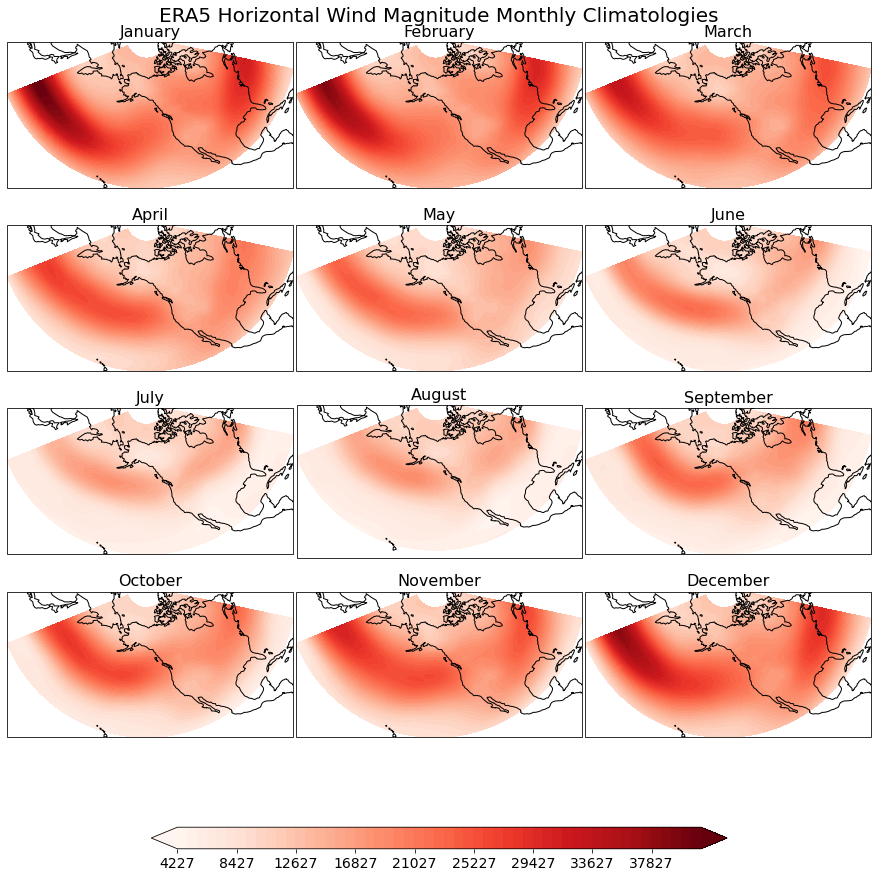

In [17]:
cm = 220

data_crs = ccrs.PlateCarree(central_longitude=cm)
proj = ccrs.NorthPolarStereo(central_longitude=cm)

# Set the axes using the specified map projection
fig,axs=plt.subplots(4,3,subplot_kw={'projection':proj},figsize=(20,15))

for i,ax in enumerate(axs.flatten()):
    cs=ax.contourf(ds_clim['lon'],ds_clim['lat'],
                    ds_clim[i,:,:],clevs,
                    transform=ccrs.PlateCarree(),
                    cmap='Reds',extend='both')
    ax.set_title(titles[i],fontdict={'fontsize':16})
    ax.coastlines()

plt.suptitle('ERA5 Horizontal Wind Magnitude Monthly Climatologies',fontsize=20)
# Add Colorbar
fig.subplots_adjust(bottom=0.3, top=0.95, left=0.2, right=0.8,
                    wspace=0.01, hspace=0.2)
cbar_ax = fig.add_axes([0.3, 0.2, 0.4, 0.02])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 